In [94]:
import pandas as pd
import numpy as np

In [95]:
import yfinance as yf

In [96]:
df = yf.download("AAPL",start="2020-01-01",end="2024-04-26")

[*********************100%%**********************]  1 of 1 completed


In [97]:
open=df["Open"]

In [98]:
open

Date
2020-01-02     74.059998
2020-01-03     74.287498
2020-01-06     73.447502
2020-01-07     74.959999
2020-01-08     74.290001
                 ...    
2024-04-19    166.210007
2024-04-22    165.520004
2024-04-23    165.350006
2024-04-24    166.539993
2024-04-25    169.529999
Name: Open, Length: 1086, dtype: float64

In [99]:
import matplotlib.pyplot as plt

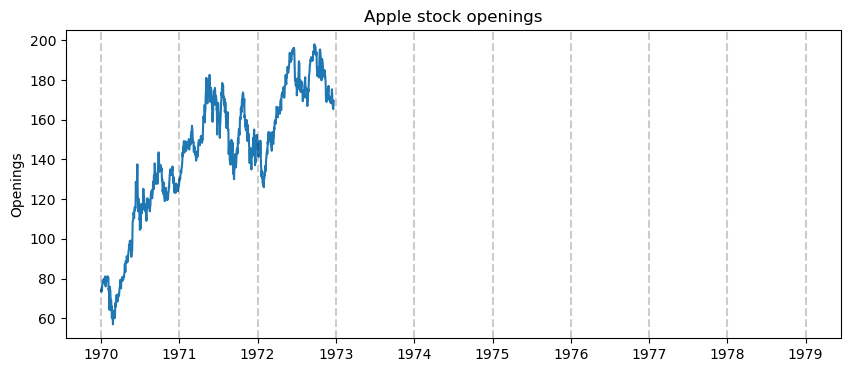

In [100]:
plt.figure(figsize=(10,4))
plt.plot(open.values)
plt.title("Apple stock openings")
plt.ylabel("Openings")
for year in range(1970,1980):
    plt.axvline(pd.to_datetime(str(year) + "-01-01"),color="k",linestyle="--",alpha=0.2)

In [101]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\91994\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


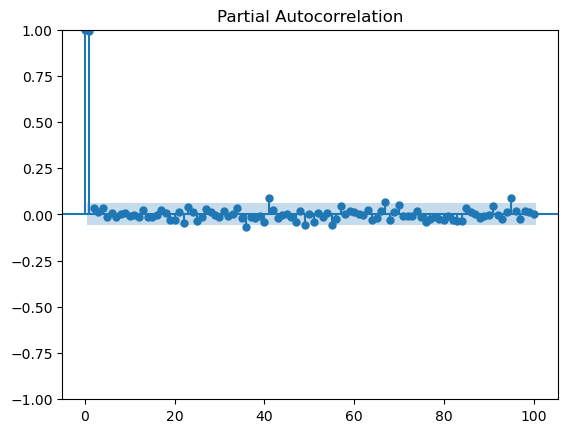

In [102]:
plot_acf = plot_pacf(open.values,lags=100)

In [103]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is B233-0680

 Directory of C:\data science\Time series

30-04-2024  10:24    <DIR>          .
24-04-2024  12:50    <DIR>          ..
30-04-2024  10:24    <DIR>          .ipynb_checkpoints
30-04-2024  10:14         2,746,434 AUTO_REGRESSION_IN_COVID19_DATASET.ipynb
19-04-2024  12:15            55,852 daily-minimum-temperatures-in-me.csv
17-04-2024  12:18            55,837 daily-minimum-temperatures-in-me.csv.xls
19-04-2024  14:41            78,199 DailyDelhiClimateTrain.csv
19-04-2024  12:19           590,808 Data Preperation.ipynb
19-04-2024  12:15             7,318 Electric_Production.csv
30-04-2024  09:53         2,201,274 Maven+Market+CSV+Files.zip
19-04-2024  12:15             6,903 monthly-beer-production-in-austr.csv
22-04-2024  14:37           370,571 ploting time series.ipynb
22-04-2024  12:07           144,488 Resampling and Interpolation.ipynb
19-04-2024  12:15               509 sales-of-shampoo-over-a-three-ye.csv
22-04-20

In [104]:
df = pd.read_csv("time-series-19-covid-combined.csv",parse_dates=True)

In [105]:
df

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
...,...,...,...,...,...,...,...,...
72085,2020-10-13,Zimbabwe,NaN,-19.015438,29.154857,8036,7632.0,230
72086,2020-10-14,Zimbabwe,NaN,-19.015438,29.154857,8055,7640.0,231
72087,2020-10-15,Zimbabwe,NaN,-19.015438,29.154857,8075,7669.0,231
72088,2020-10-16,Zimbabwe,NaN,-19.015438,29.154857,8099,7673.0,231


In [146]:
df_new = df[["Date","Country/Region","Confirmed"]]

In [147]:
df_new

,Date,Country/Region,Confirmed
0,2020-01-22,Afghanistan,0
1,2020-01-23,Afghanistan,0
2,2020-01-24,Afghanistan,0
3,2020-01-25,Afghanistan,0
4,2020-01-26,Afghanistan,0
...,...,...,...
72085,2020-10-13,Zimbabwe,8036
72086,2020-10-14,Zimbabwe,8055
72087,2020-10-15,Zimbabwe,8075
72088,2020-10-16,Zimbabwe,8099


In [148]:
df_new["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [149]:
df_arr = df_new[df_new["Country/Region"] == "Cuba"]

In [150]:
df_arr

,Date,Country/Region,Confirmed
25920,2020-01-22,Cuba,0
25921,2020-01-23,Cuba,0
25922,2020-01-24,Cuba,0
25923,2020-01-25,Cuba,0
25924,2020-01-26,Cuba,0
...,...,...,...
26185,2020-10-13,Cuba,6017
26186,2020-10-14,Cuba,6035
26187,2020-10-15,Cuba,6062
26188,2020-10-16,Cuba,6118


In [151]:
df_arr.drop(columns="Country/Region",inplace=True)

C:\Users\91994\AppData\Local\Temp\ipykernel_27208\2504828895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arr.drop(columns="Country/Region",inplace=True)


In [152]:
df_arr

,Date,Confirmed
25920,2020-01-22,0
25921,2020-01-23,0
25922,2020-01-24,0
25923,2020-01-25,0
25924,2020-01-26,0
...,...,...
26185,2020-10-13,6017
26186,2020-10-14,6035
26187,2020-10-15,6062
26188,2020-10-16,6118


In [153]:
df_arr=df_arr.set_index("Date")

In [180]:
arr=df_arr.squeeze()

In [181]:
from statsmodels.tsa.stattools import adfuller

In [182]:
# Function to check stationarity using Dickey-Fuller test
def check_stationarity(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

In [183]:
check_stationarity(arr)

ADF Statistic: 0.7364730498926362
p-value: 0.990538340318378
Critical Values:
	1%: -3.455365238788105
	5%: -2.8725510317187024
	10%: -2.5726375763314966


In [184]:
import matplotlib.pyplot as plt

In [185]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

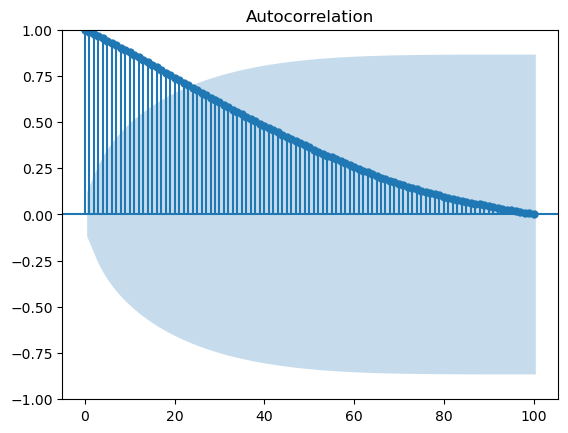

In [186]:
acf_plot=plot_acf(arr,lags=100)

C:\Users\91994\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


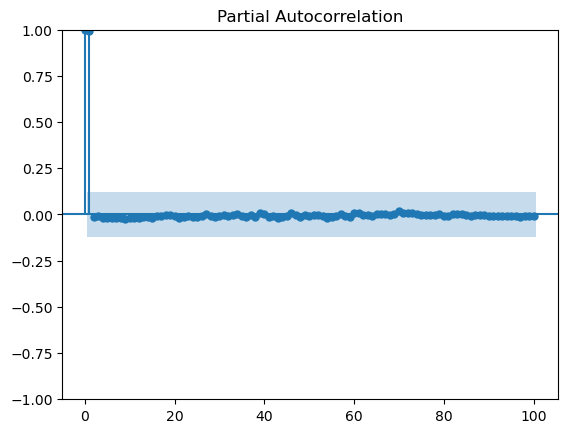

In [187]:
pacf_plot= plot_pacf(arr,lags=100)

Get training and testing data

In [188]:
from datetime import datetime,timedelta

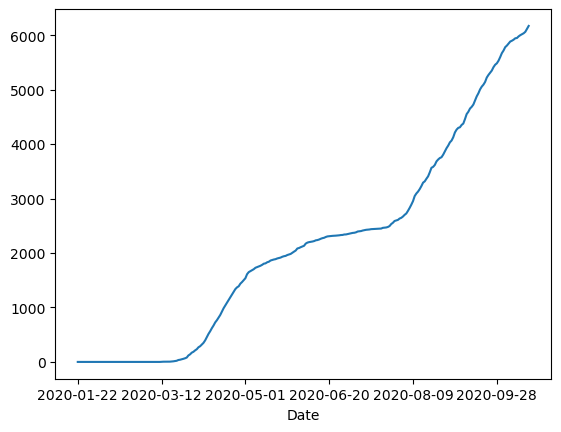

In [189]:
arr.plot()
plt.show()

In [190]:
train_end = datetime(2020,7,30)
test_end = datetime(2020,10,17)

In [191]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


C:\Users\91994\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


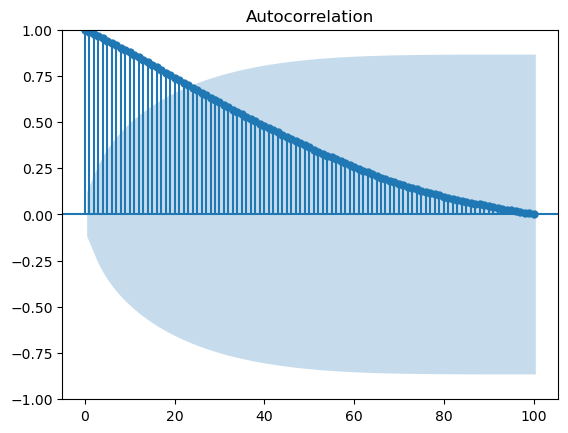

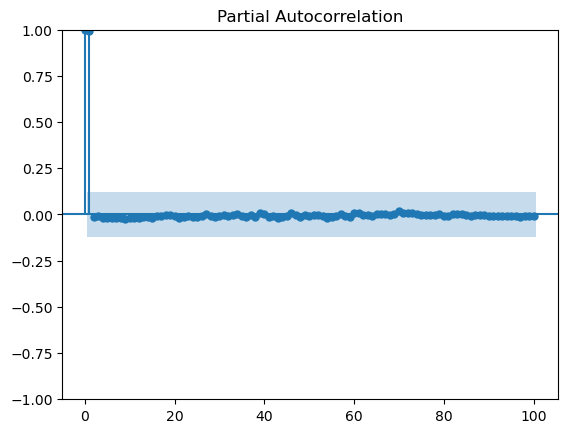

In [192]:
plot_acf(arr,lags=100)
plot_pacf(arr,lags=100)
plt.show()

split data

In [193]:
split_ratio = 0.8
split_index = int(len(arr)*split_ratio)
train_data,test_data=arr[:split_index],arr[split_index:]

In [194]:
from statsmodels.tsa.ar_model import AutoReg

In [195]:
lag_value =7

# fitting 
model_arr = AutoReg(train_data,lags=lag_value)
model_fit_arr = model_arr.fit()

C:\Users\91994\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [196]:
from statsmodels.tsa.arima.model import ARIMA

In [171]:
print(model_fit_arr.summary())

                            AutoReg Model Results                             
Dep. Variable:              Confirmed   No. Observations:                  216
Model:                     AutoReg(7)   Log Likelihood                -781.834
Method:               Conditional MLE   S.D. of innovations             10.195
Date:                Tue, 30 Apr 2024   AIC                           1581.669
Time:                        11:17:38   BIC                           1611.750
Sample:                    01-29-2020   HQIC                          1593.831
                         - 08-24-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.5585      1.188      1.312      0.189      -0.769       3.886
Confirmed.L1     1.4554      0.070     20.842      0.000       1.319       1.592
Confirmed.L2    -0.3402      0.124     -2.74

In [172]:
n_train_arr = len(train_data)
n_test_arr = len(test_data)
prediction = model_fit_arr.predict(start=n_train_arr,end=n_train_arr + n_test_arr-1,dynamic=False)

C:\Users\91994\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [173]:
prediction

2020-08-25    3757.270902
2020-08-26    3791.136853
2020-08-27    3830.885029
2020-08-28    3873.146865
2020-08-29    3909.125038
2020-08-30    3946.155214
2020-08-31    3982.500001
2020-09-01    4019.602541
2020-09-02    4056.248426
2020-09-03    4091.500589
2020-09-04    4126.827818
2020-09-05    4161.845980
2020-09-06    4196.655306
2020-09-07    4231.023647
2020-09-08    4264.930733
2020-09-09    4298.642483
2020-09-10    4332.059885
2020-09-11    4365.187024
2020-09-12    4398.003088
2020-09-13    4430.534814
2020-09-14    4462.827624
2020-09-15    4494.862190
2020-09-16    4526.645747
2020-09-17    4558.185661
2020-09-18    4589.495403
2020-09-19    4620.586060
2020-09-20    4651.458930
2020-09-21    4682.121792
2020-09-22    4712.582349
2020-09-23    4742.848276
2020-09-24    4772.926013
2020-09-25    4802.820770
2020-09-26    4832.539022
2020-09-27    4862.086899
2020-09-28    4891.470184
2020-09-29    4920.694286
2020-09-30    4949.764407
2020-10-01    4978.685844
2020-10-02  

In [174]:
residuals_arr = test_data - prediction

In [175]:
residuals_arr

2020-08-25 00:00:00   NaN
2020-08-26 00:00:00   NaN
2020-08-27 00:00:00   NaN
2020-08-28 00:00:00   NaN
2020-08-29 00:00:00   NaN
                       ..
2020-10-13            NaN
2020-10-14            NaN
2020-10-15            NaN
2020-10-16            NaN
2020-10-17            NaN
Length: 108, dtype: float64

Text(0, 0.5, 'Error')

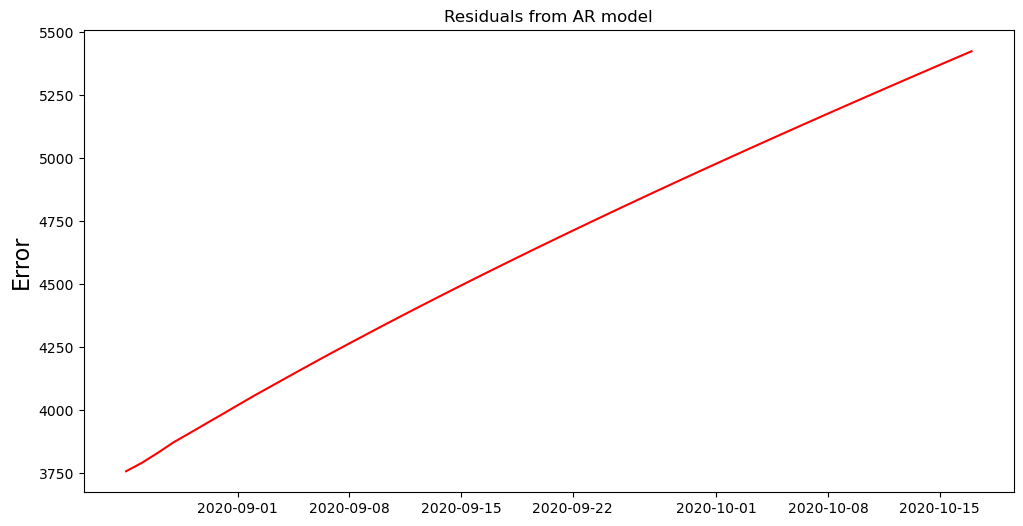

In [176]:
plt.figure(figsize=(12,6))
plt.plot(prediction,color='r')
plt.title("Residuals from AR model")
plt.ylabel("Error",fontsize=16)